In [78]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
!ls

Per_file_type_count_github.ipynb per_file_row_type_stats.ndjson


Can get the file `per_file_row_type_stats.ndjson` by running the test `TEST(AllQueries, AllUniqueRowTypesFromSample)` over full data.

In [3]:
df = pd.read_json('per_file_row_type_stats.ndjson', lines=True)

In [4]:
len(df)

94119

In [5]:
df_global = df.groupby('type')[['type_count']].sum().reset_index()

In [6]:
df_sorted = df_global.sort_values(by='type_count', ascending=False).reset_index(drop=True)

<AxesSubplot: >

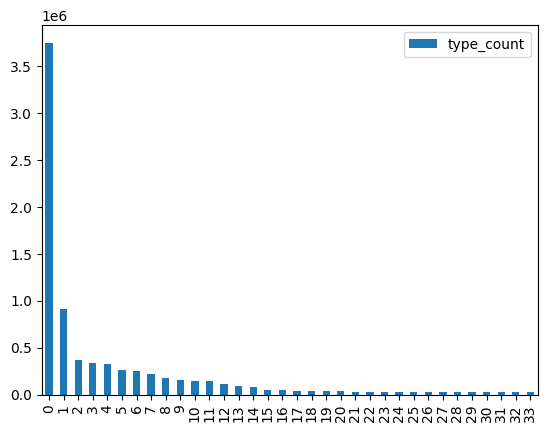

In [8]:
df_sorted[df_sorted['type_count'] > 20000].plot.bar()

In [85]:
# Interesting: How does distribution look per event type?
# How much variey within PushEvents? How much variety within ForkEvents?

In [26]:
# basically marginal vs. global plot out different types.

In [27]:
# Check for each marginal what the top 10 types are. => Then combine them, and get global counts.
# Visualize this for the dataset.

In [14]:
df.head()

,path,row_count,type,type_count
0,/hot/data/github_daily/2011-10-15.json,48899,"Row['type'->str,'public'->bool,'actor'->Struct...",1
1,/hot/data/github_daily/2011-10-15.json,48899,"Row['type'->str,'public'->bool,'actor'->Struct...",1
2,/hot/data/github_daily/2011-10-15.json,48899,"Row['type'->str,'public'->bool,'actor'->Struct...",1
3,/hot/data/github_daily/2011-10-15.json,48899,"Row['type'->str,'public'->bool,'actor'->Struct...",2
4,/hot/data/github_daily/2011-10-15.json,48899,"Row['type'->str,'public'->bool,'actor'->Struct...",1


In [21]:
idx = df.groupby('path')['type_count'].nlargest(5).reset_index()['level_1']

In [36]:
types_to_plot = df.loc[idx]['type'].unique()

# sort them after type count
sorted_most_common_df = df[df.type.isin(types_to_plot)].groupby('type').sum().reset_index().sort_values(by='type_count', ascending=False).reset_index(drop=True)

/var/folders/l7/8zgzcszx7z5gk7kk92f6nc1c0000gn/T/ipykernel_13877/3615346677.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorted_most_common_df = df[df.type.isin(types_to_plot)].groupby('type').sum().reset_index().sort_values(by='type_count', ascending=False).reset_index(drop=True)


In [86]:
len(sorted_most_common_df)

31

In [40]:
types_to_plot = sorted_most_common_df.type.to_list()

<BarContainer object of 31 artists>

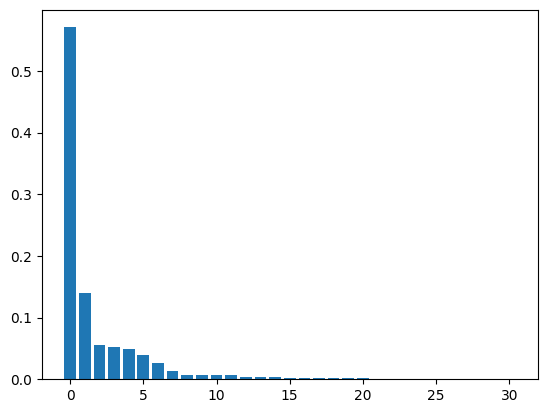

In [53]:
# plot global distribution, normalize.
N = len(sorted_most_common_df)
plt.bar(x=range(N), height=sorted_most_common_df.type_count / sorted_most_common_df.type_count.sum())

6575661

In [49]:
# sort for specific path
df.head()

,path,row_count,type,type_count
0,/hot/data/github_daily/2011-10-15.json,48899,"Row['type'->str,'public'->bool,'actor'->Struct...",1
1,/hot/data/github_daily/2011-10-15.json,48899,"Row['type'->str,'public'->bool,'actor'->Struct...",1
2,/hot/data/github_daily/2011-10-15.json,48899,"Row['type'->str,'public'->bool,'actor'->Struct...",1
3,/hot/data/github_daily/2011-10-15.json,48899,"Row['type'->str,'public'->bool,'actor'->Struct...",2
4,/hot/data/github_daily/2011-10-15.json,48899,"Row['type'->str,'public'->bool,'actor'->Struct...",1


In [80]:
def plot_file_vs_global(path):
    
    # plot global distribution, normalize.
    N = len(sorted_most_common_df)
    plt.bar(x=range(N),
            height=sorted_most_common_df.type_count / sorted_most_common_df.type_count.sum(), 
            alpha=.7,
           label='global')
    
    subdf = df[df.path==path]

    yq = pd.merge(subdf, sorted_most_common_df, on='type', how='right').fillna(0)['type_count_x']

    plt.bar(x=range(N), height=yq / yq.sum(), alpha=.7, label=os.path.basename(path))
    
    sns.despine()
    plt.legend(loc='best')

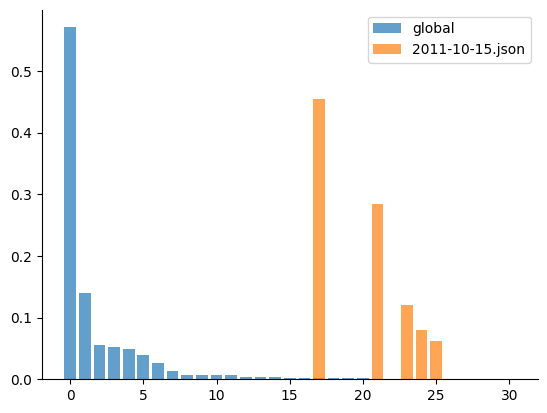

In [81]:
path='/hot/data/github_daily/2011-10-15.json'
plot_file_vs_global(path)

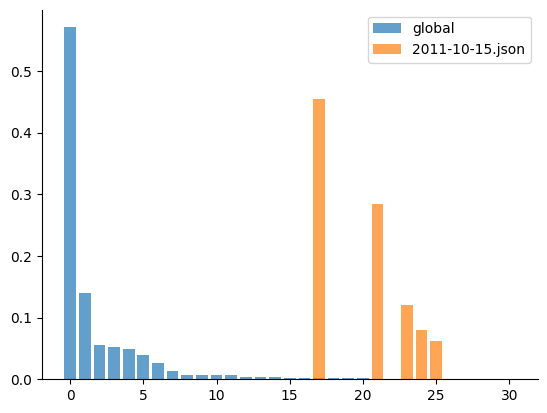

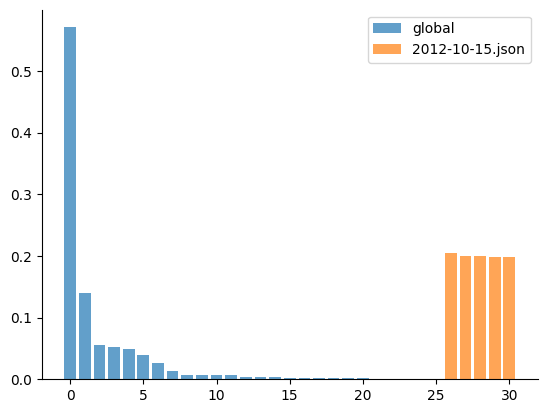

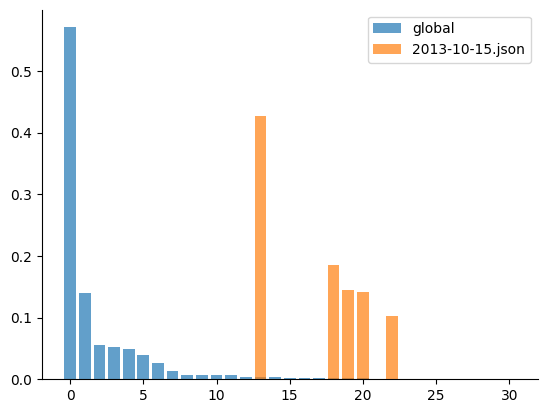

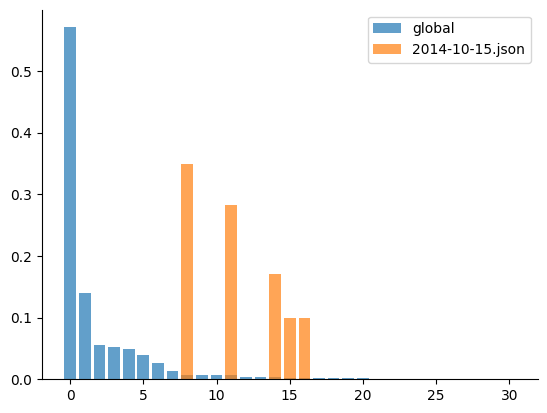

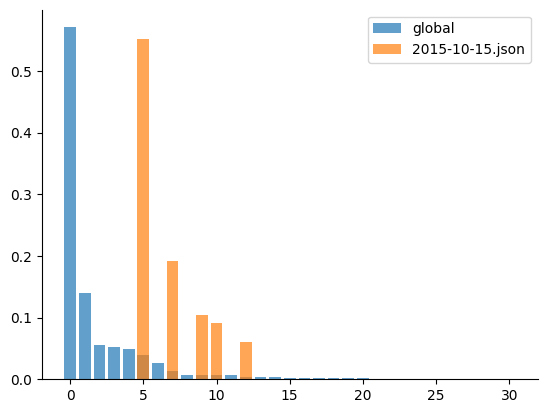

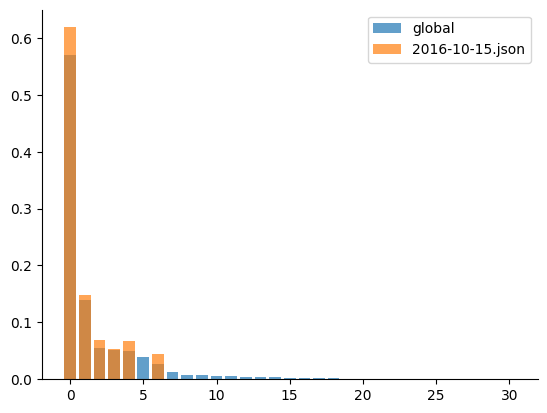

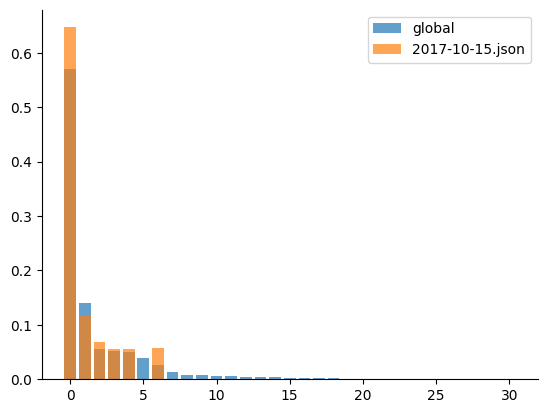

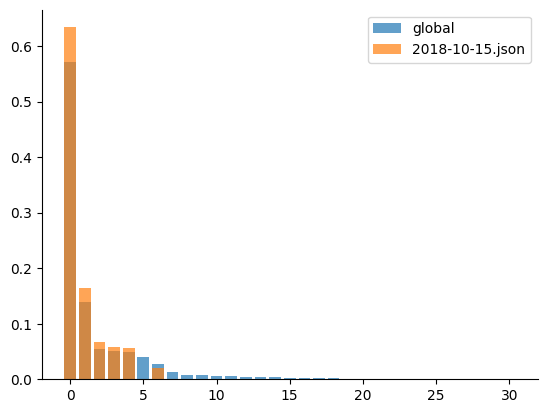

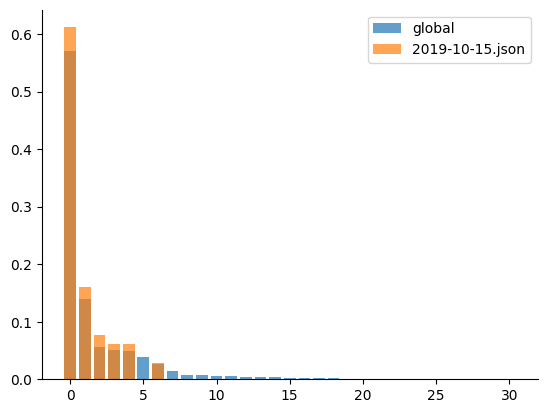

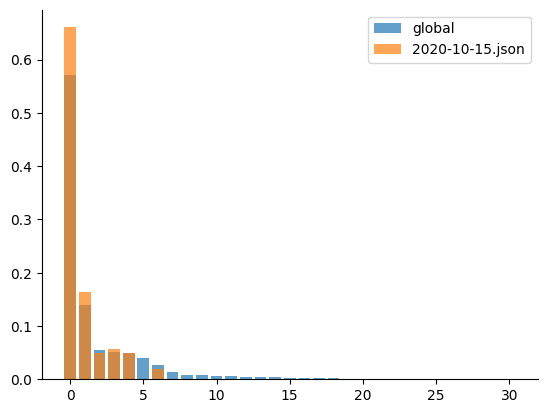

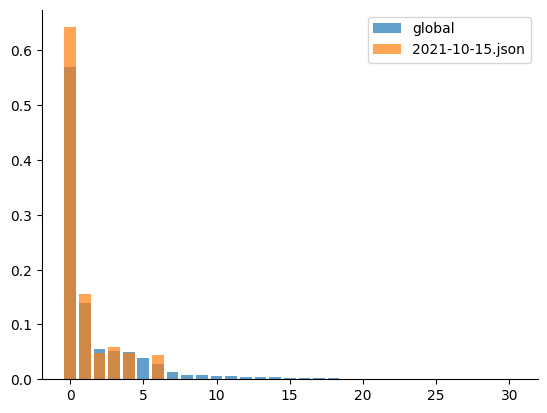

In [84]:
for path in df['path'].unique():
    plt.figure()
    plot_file_vs_global(path)